In [1]:
%cd /kaggle/working

import os

from hydra import compose, initialize
from omegaconf import OmegaConf

with initialize(version_base=None, config_path="../experiments/032_feature_channel"):
    cfg = compose(
        config_name="config.yaml", overrides=["debug=True"], return_hydra_config=True
    )

/kaggle/working


In [2]:
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import seaborn as sns

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(100)

polars.config.Config

In [13]:
df = pl.read_parquet("input/train.parquet", n_rows=100000)

In [25]:
h = 40
tmp = df

tmp = tmp.with_columns(
    [
        (pl.col(f"state_t_{h}") + 1200.0 * pl.col(f"ptend_t_{h}")).alias(f"new_t_{h}"),
        (pl.col(f"ptend_q0001_{h}") * 1200.0),
        (pl.col(f"ptend_q0002_{h}") * 1200.0),
        (pl.col(f"ptend_q0003_{h}") * 1200.0),
        (pl.col(f"state_q0002_{h}") + pl.col(f"state_q0003_{h}")).alias(
            f"state_cloud_water_{h}"
        ),
        (pl.col(f"ptend_q0002_{h}") + pl.col(f"ptend_q0003_{h}")).alias(
            f"ptend_cloud_water_{h}"
        ),
        (
            pl.col(f"state_q0003_{h}")
            / (pl.col(f"state_q0002_{h}") + pl.col(f"state_q0003_{h}") + 1e-60)
        ).alias("state_ice_ratio"),
        (
            pl.col(f"ptend_q0003_{h}")
            / (pl.col(f"ptend_q0002_{h}") + pl.col(f"ptend_q0003_{h}") + 1e-60)
        ).alias("ptend_ice_ratio"),
    ]
)

cols = [
    f"state_t_{h}",
    f"new_t_{h}",
    f"state_q0001_{h}",
    f"ptend_q0001_{h}",
    f"state_cloud_water_{h}",
    f"ptend_cloud_water_{h}",
    f"state_q0002_{h}",
    f"ptend_q0002_{h}",
    f"state_q0003_{h}",
    f"ptend_q0003_{h}",
    "state_ice_ratio",
    "ptend_ice_ratio",
]

tmp[cols].head()

state_t_40,new_t_40,state_q0001_40,ptend_q0001_40,state_cloud_water_40,ptend_cloud_water_40,state_q0002_40,ptend_q0002_40,state_q0003_40,ptend_q0003_40,state_ice_ratio,ptend_ice_ratio
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
273.809924,273.781051,0.001845,-0.000002,7.5343e-8,-6.2786e-11,3.5920e-8,-3.5920e-8,3.9423e-8,-3.9423e-8,0.523242,0.523242
270.031305,269.996256,0.001441,0.000002,0.000002,-1.5434e-9,9.1013e-7,-9.1013e-7,9.4192e-7,-9.4192e-7,0.508581,0.508581
277.506678,277.486619,0.003403,0.000014,3.3294e-7,-2.7745e-10,3.3294e-7,-3.3294e-7,0.0,0.0,0.0,-0.0
277.292413,277.26869,0.003594,-0.000013,0.000004,-3.2619e-9,0.000004,-0.000004,0.0,0.0,0.0,-0.0
266.889962,266.853093,0.001652,0.000005,0.000003,-2.4003e-9,0.000001,-0.000001,0.000002,-0.000002,0.60542,0.60542


In [26]:
tmp[cols].quantile(0.999)

state_t_40,new_t_40,state_q0001_40,ptend_q0001_40,state_cloud_water_40,ptend_cloud_water_40,state_q0002_40,ptend_q0002_40,state_q0003_40,ptend_q0003_40,state_ice_ratio,ptend_ice_ratio
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
281.437017,281.443785,0.00929,0.000319,0.000192,7.0355e-8,0.000161,0.000083,0.000101,0.000029,1.0,13.256887


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



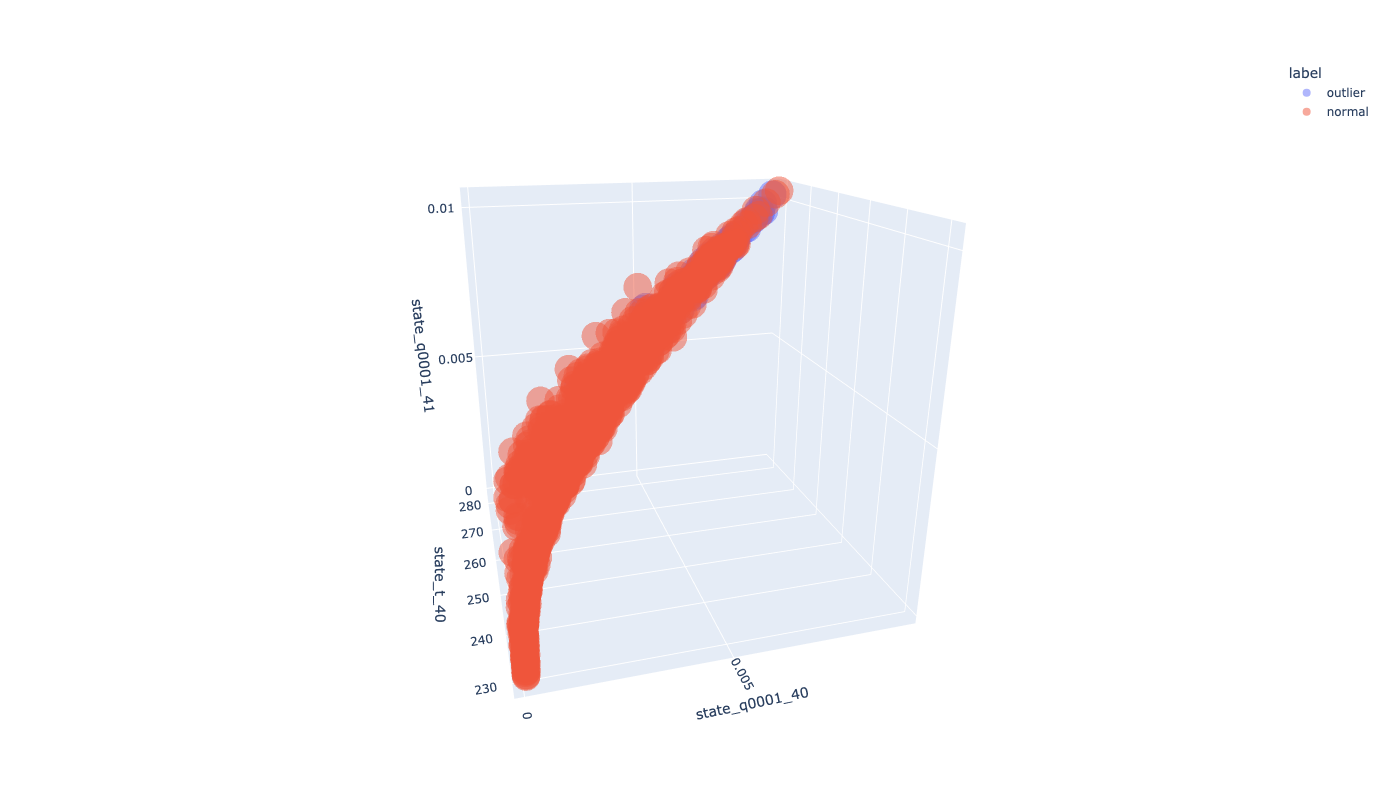

In [53]:
import plotly.express as px

tmp1 = tmp.filter(pl.col(f"ptend_q0002_{h}") > 0.00008).with_columns(
    pl.lit("outlier").alias("label")
)
tmp2 = (
    tmp.filter(pl.col(f"ptend_q0002_{h}") < 0.00008)
    .sample(len(tmp1) * 10)
    .with_columns(pl.lit("normal").alias("label"))
)

t = pl.concat([tmp1, tmp2])

px.scatter_3d(
    t,
    x="state_q0001_40",
    y="state_t_40",
    z="state_q0001_41",
    color="label",
    opacity=0.5,
    width=800,
    height=800,
)